In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

# 자동차 데이터 분석
미국에서 판매 중인 28개 브랜드의 중고 차량 정보로 탐색적 데이터 분석(`EDA`)을 수행합니다. 데이터는 12개의 컬럼으로 구성돼 있습니다. 

In [6]:
df = pd.read_csv("https://drive.google.com/u/0/uc?id=1DJVEQAUcAZ_eIW1aXGFHnynnavN7ki2y&export=download", index_col=0)
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 253.8+ KB


In [8]:
print(len(df.columns))

12


| column | 설명 |
|--|--|
| price | 판매가격 |
| brand | 자동차 브랜드 |
| model | 자동차 모델 |
| year | 자동차 생상년도 |
| title_status | 사고차량, 무사고차량 구분 |
| mileage | 차량 주행 거리 |
| color | 차량 색상 |
| vin | 차량 고유번호 |
| lot | 제조 업체별 혹은 특정 그룹별로 할당된 번호 |
| state | 차량 위치 |
| country | 판매 나라 | 
| condition | 판매 남은 시간 |

# 데이터 전처리

###### 문제-1
`condition` 컬럼에는 문자열 형태로 시간 정보가 저장돼 있습니다. 이를 분(`minute`)으로 환산해서 숫자로 저장하세요. 
- 이 때, 'Listing Expired'는 0으로 치환합니다. 

In [9]:
df['condition'].unique()

array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '8 days left', '7 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

`color` 컬럼에는 `no_color`로 표기된 항목이 61개, `color:`로 표기된 항목이 5개 존재합니다. 

In [11]:
print(len(df.loc[df['color'] == 'no_color']))
print(len(df.loc[df['color'] == 'color:']))

61
5


###### 문제-2

In [12]:
nc = df.loc[df['color'] == 'no_color']
nc.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
33,5330,ford,mpv,2017,clean vehicle,37792.0,no_color,2fmpk3j9xhbb56401,167656127,texas,usa,2 days left
52,27000,buick,enclave,2017,clean vehicle,32107.0,no_color,5gakrckdxhj113512,167763677,tennessee,usa,22 hours left
104,25201,cadillac,door,2017,clean vehicle,19011.0,no_color,1gyknbrs8hz257399,167765111,michigan,usa,2 days left
107,18003,chevrolet,malibu,2017,clean vehicle,19117.0,no_color,1g1zh5sx7hf141060,167765112,michigan,usa,17 hours left
215,17000,ford,door,2016,clean vehicle,126802.0,no_color,1ft7w2b60geb96643,167757879,florida,usa,2 hours left


In [13]:
df['color'].unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'no_color', 'gold', 'charcoal', 'turquoise', 'beige',
       'green', 'dark blue', 'maroon', 'phantom black', 'yellow',
       'color:', 'light blue', 'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

In [14]:
df.groupby(['model'], as_index=False)['color']

`color` 컬럼이 `no_color` 혹은 `color:`로 표기된 데이터는 값이 존재하기는 하지만 의미 없는 값(이하 결측값)입니다. `color` 컬럼을 제외하고 나머지 데이터는 정상이기 때문에 최대한 데이터를 사용하기 위해 결측값을  유사한 값으로 채워 넣고자 합니다. 동일한 `model`의 차 중에서 가장 많은 차의 색상을 찾아서 결측값을 치환하세요. 

----

이해를 돕기 위해 예를 들어 보겠습니다. 원본 `df`에 저장된 mpv 차량 중 가장 많이 매물로 올라온 색상은 `white`입니다. mpv의 차량이 `white`일 확률이 높기 때문에 결측값(`no_color` 혹은 `color`)을 `white`로 치환할 수 있습니다. 이러한 과정을 전체 `no_color`와 `color:` 색상의 차에 "반복"해서 적용해야 합니다.

우선 `no_color`를 치환해 봅시다. 

In [15]:
for idx in nc.index:    
    tg_model = nc.loc[idx, 'model']    
    tmp = df.loc[(df['model'] == tg_model) & (df['color'] != "no_color"), 'color']        
    c = tmp.value_counts().index[0]    
    df.loc[idx, 'color'] = c

다음 코드를 실행했을 때 0이 나와야 합니다. 

In [16]:
print((df['color'] == "no_color").sum())

0


이어서 `color:`를 치환합니다. 
- 단, 같은 차종이 존재하지 않는 경우 `white`로 채워넣습니다.

In [17]:
nc = df.loc[df['color'] == 'color:']
nc.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
528,1025,peterbilt,truck,2010,salvage insurance,1017936.0,color:,1xp7d49x0ad793710,167529842,georgia,usa,17 hours left
1848,4200,ford,cutaway,2015,salvage insurance,80032.0,color:,1fdfe4fs3fda25516,167529792,illinois,usa,16 hours left
1867,20000,ford,dr,2012,salvage insurance,24581.0,color:,3frxw7fe4cv310949,167530331,california,usa,16 hours left
1880,8000,ford,cutaway,2013,salvage insurance,250831.0,color:,1fdfe4fs4dda28874,167530369,new jersey,usa,16 hours left
1994,25998,ford,doors,2015,clean vehicle,25734.0,color:,1fa6p8cf9f5365377,167564815,new york,usa,9 days left


In [18]:
for idx in nc.index:    
    tg_model = nc.loc[idx, 'model']    
    tmp = df.loc[(df['model'] == tg_model) & (df['color'] != "color:"), 'color']        
    if tmp.count() == 0:
        c = "white"
    else:
        c = tmp.value_counts().index[0]    
    df.loc[idx, 'color'] = c

다음 코드를 실행했을 때 0이 나와야 합니다. 

In [19]:
print((df['color'] == "color:").sum())

0


###### 문제-3
비슷한 종류의 색상으로 `color`를 재분류해 봅시다. 현재 `color` 컬럼에는 47개의 색상이 표기돼 있습니다. 

In [20]:
df["color"].nunique()

47

In [21]:
df['color'].unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'gold', 'charcoal', 'turquoise', 'beige', 'green',
       'dark blue', 'maroon', 'phantom black', 'yellow', 'light blue',
       'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

위 color를 다음의 `target` 변수에 저장된 대표 색상으로 분류하세요. 컬럼 값 중에서 `black`이 포함된 `super black`, `phantom black`, `black clearcoat` 등은 모두 `black`으로 분류 합니다. `target`에 포함되지 않은 색상은 `etc`로 분류하세요.

In [22]:
target = ['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange', 'brown', 'gold', 'charcoal', 'turquoise', 'beige', 'green', 'maroon', 'yellow', 'purple', 'guard', 'tan', 'burgundy' ]

In [23]:
len(target)

19

`map` 메서드로 해결해 보세요

In [24]:
def cat(x):
    target = [
        'black',
        'silver',
        'blue',
        'red',
        'white',
        'gray',
        'orange',
        'brown',
        'gold',
        'charcoal',
        'turquoise',
        'beige',
        'green',
        'maroon',
        'yellow',
        'purple',
        'guard',
        'tan',
        'burgundy'
    ]
    
    choose = "etc"
    for color in target:
        if color in x:
            choose = color
            break

    return choose

df['n_color'] = df['color'].map(cat)
df['n_color'].nunique()
df['n_color'].unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'gold', 'charcoal', 'turquoise', 'beige', 'green',
       'maroon', 'yellow', 'purple', 'etc', 'guard', 'tan', 'burgundy'],
      dtype=object)

# 데이터 분석

###### 문제-4
분위값은 `price`를 일렬로 세워놓고 가격순으로 5등분 해 평균한 것입니다. 분위배율은 상위 20% 평균 가격(5분위값)을 하위 20%의 평균 가격(1분위값)으로 나눈 값입니다. 이 값이 클수록 양극화가 심하다는 의미입니다. `brand` 별로 `price`의 분위배율을 출력하세요.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
 12  n_color       2499 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 337.9+ KB


In [26]:
gb = df[['brand', 'price']].groupby('brand')
gb.quantile(0.8) / gb.quantile(0.2)

,price
brand,
acura,5.416667
audi,1750.666667
bmw,5.174935
buick,2.009009
cadillac,1.808071
chevrolet,3.725000
chrysler,6.856781
dodge,2.409782
ford,3.056680


###### 문제-5
위 문제의 출력된 결과를 보니 `audio`의 분위배율이 이상하게 높습니다. 사고차와 무사고차의 가격은 크게 다를 것으로 예상됩니다. `title_status`에 따른 가격분위배율을 확인해 봅시다. 출력은 아래와 같이 `clean vehicle`과 `salvage insurance` 컬럼으로 데이터를 정리하세요.

In [27]:
gb = df[['brand', 'price', 'title_status']].groupby(['brand', 'title_status'])
r = gb.quantile(0.8) / gb.quantile(0.2)
r.unstack()['price']

title_status,clean vehicle,salvage insurance
brand,,
acura,2.200000,1.000000
audi,1.443182,4.000000
bmw,2.237935,3.404110
buick,1.906383,NaN
cadillac,1.763034,NaN
chevrolet,2.921456,inf
chrysler,4.235727,2.636364
dodge,1.958991,4.119048
ford,2.583183,inf


# 시각화

###### 문제-6
`brand`별로 운행거리(`mileage`)와 가격(`price`)의 산포도를 확인하고자 합니다. x축에 운행거리, y축에 가격을 시각화하세요. 
- 참고 : https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

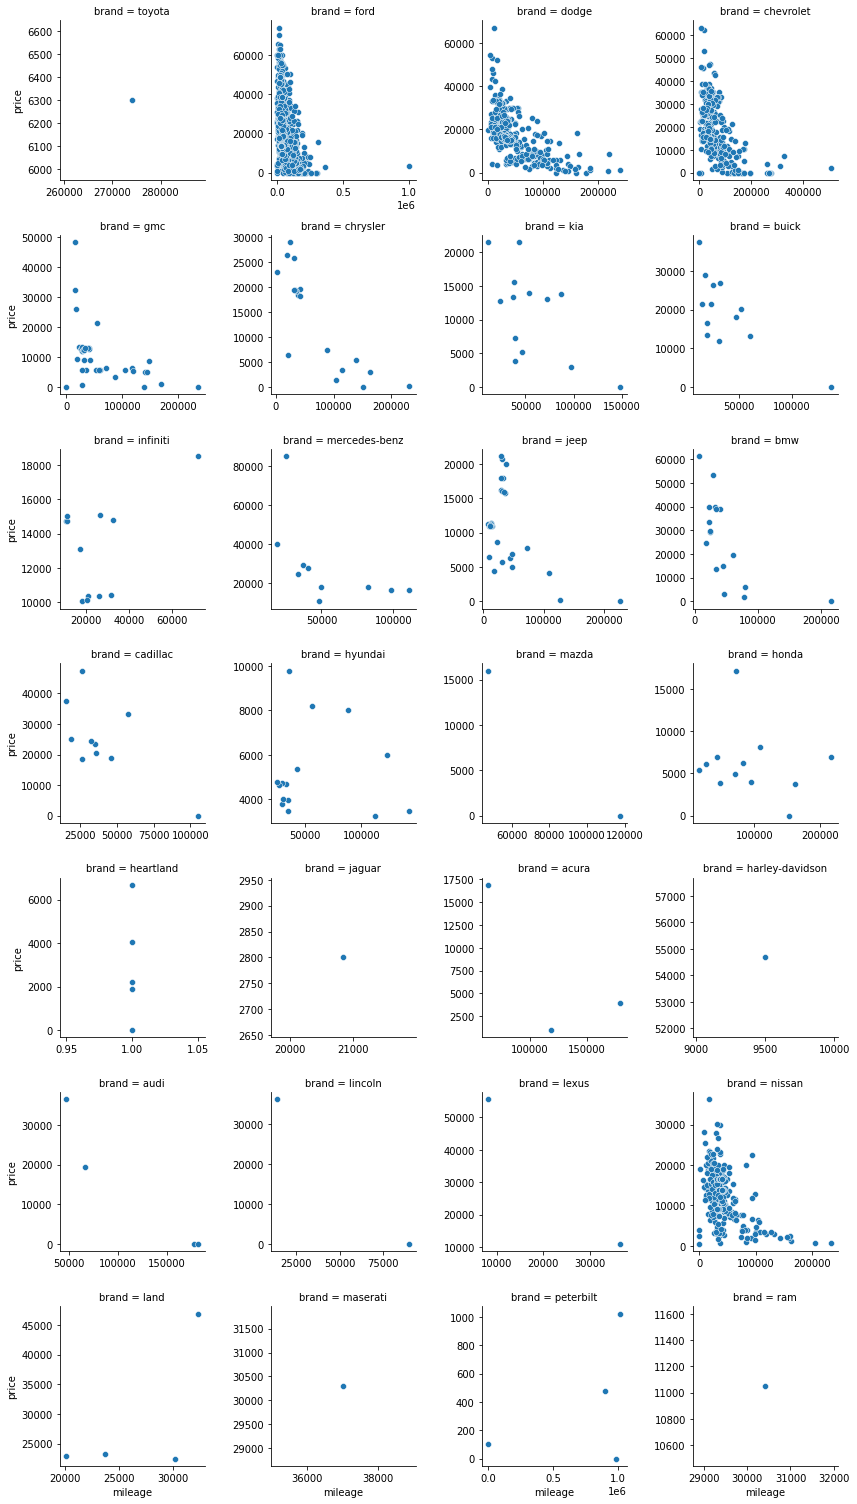

In [28]:
g = sns.FacetGrid(df, col="brand", col_wrap=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'mileage', 'price')

###### 문제-7
문제 6에서 `brand` 별로 `mileage`의 이상치를 제거하고 산점도를 시각화해 봅시니다. 이상치는 다음 범위를 벗어난 값을 이상치로 정의합니다. `brand` 별로 이상치를 계산해서 `outlier`를 제거해야 합니다.단, 데이터가 1개라서 표준편차를 구할 수 없는 경우 결과에서 제외합니다.
> m - $\sigma$ <= x <= m + $\sigma$    
> ($\sigma$: 표준편차, m: 평균)


단계별로 문제를 풀어봅시다. 우선 브랜드별 평균과 표준편차를 계산합니다.

In [29]:
how = [np.mean, np.std]
ms = df[['brand', 'mileage']].groupby('brand').agg(how)['mileage']
ms.head()

,mean,std
brand,,
acura,120379.666667,57973.844881
audi,118091.000000,71521.174100
bmw,47846.411765,47889.300539
buick,37926.846154,33336.315080
cadillac,40195.900000,25983.241909


`lower`(m - $\sigma$)과 `upper`(m + $\sigma$) 컬럼으로 수치를 정리합니다. 

In [35]:
lower = ms['mean'] - ms['std']
upper = ms['mean'] + ms['std']
bound = pd.concat([lower, upper], axis=1, keys=['lower', 'upper'])
bound.head()
bound

,lower,upper
brand,,
acura,62405.821785,1.783535e+05
audi,46569.825900,1.896122e+05
bmw,-42.888774,9.573571e+04
buick,4590.531073,7.126316e+04
cadillac,14212.658091,6.617914e+04
chevrolet,4217.608409,1.260313e+05
chrysler,9187.212599,1.368208e+05
dodge,6499.166611,8.187056e+04
ford,-2864.189609,1.070328e+05


위에서 구한 데이터프레임과 원본 데이터프레임 `df`를 `merge` 합니다. 

In [31]:
r = pd.merge(df, bound.reset_index(), on='brand')
r.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,n_color,lower,upper
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,black,NaN,NaN
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,silver,-2864.189609,107032.798516
2,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,blue,-2864.189609,107032.798516
3,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left,black,-2864.189609,107032.798516
4,20700,ford,door,2013,clean vehicle,100757.0,black,1ftfw1et7dfa47790,167753916,virginia,usa,22 hours left,black,-2864.189609,107032.798516


조건 슬라이싱으로 범위(`lower` 이상 `upper` 이하) 조건을 만족하는 데이터만 슬라이싱합니다.

In [32]:
cond0 = r['mileage'] >= r['lower']
cond1 = r['mileage'] <= r['upper']
result = r.loc[cond0 & cond1].dropna()
result.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,n_color,lower,upper
2,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,blue,-2864.189609,107032.798516
3,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left,black,-2864.189609,107032.798516
4,20700,ford,door,2013,clean vehicle,100757.0,black,1ftfw1et7dfa47790,167753916,virginia,usa,22 hours left,black,-2864.189609,107032.798516
5,5210,ford,mpv,2017,clean vehicle,35714.0,white,2fmpk3j95hbb73607,167656124,texas,usa,2 days left,white,-2864.189609,107032.798516
6,38100,ford,door,2013,clean vehicle,54380.0,gray,1ft8w3dt5deb68569,167753923,virginia,usa,22 hours left,gray,-2864.189609,107032.798516


차트로 시각화합니다. 

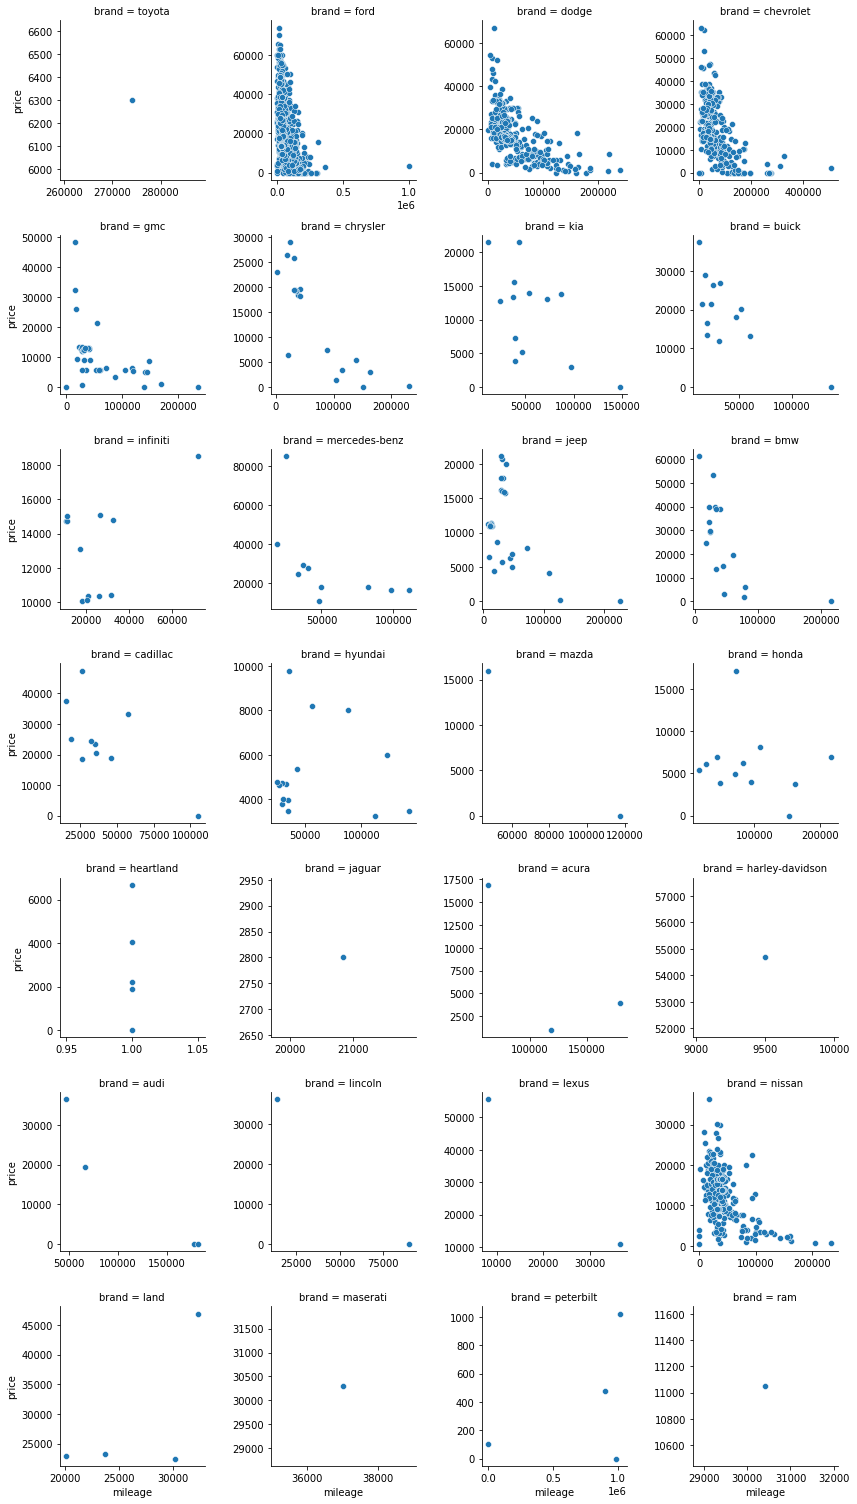

In [33]:
g = sns.FacetGrid(df, col="brand", col_wrap=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'mileage', 'price')